#Context
I used this dataset to continue with ML practices, in this case with KMeans Clustering in Customer Segmentation.



#Analysis and importation of libraries.






In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [117]:
df = pd.read_csv("Mall_Customers.csv")

In [118]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [119]:
df.shape

(200, 5)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [121]:
df.isnull().sum()


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#There are no null or missing values.






In [122]:
df['Genre'].value_counts(normalize=True)


Female    0.56
Male      0.44
Name: Genre, dtype: float64

In [123]:
sns.pairplot(df,hue='Genre')


Here we noticed that women buy more than men and spend more.

#Kmeans

In [ ]:
X = df.iloc[:, [3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [ ]:
#elbow method
from sklearn.cluster import KMeans
wcss = []

In [ ]:
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init="k-means++", random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\gonza\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


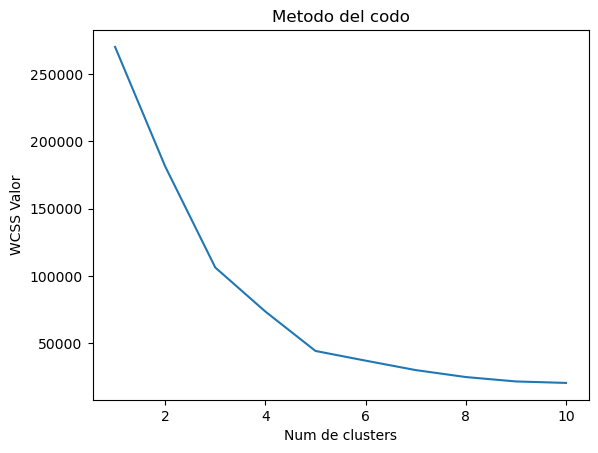

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("Metodo del codo")
plt.xlabel("Num de clusters")
plt.ylabel("WCSS Valor")
plt.show()

In [ ]:
kmeansmodel = KMeans(n_clusters=5, init="k-means++", random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

<function matplotlib.pyplot.show(close=None, block=None)>

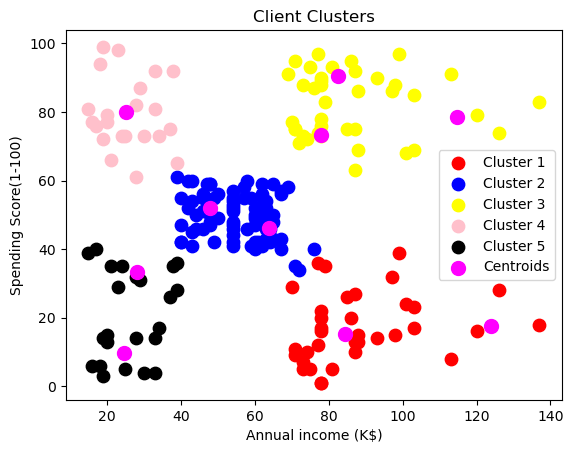

In [ ]:
plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s= 80, c= "red", label ="Cluster 1")
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s= 80, c= "blue", label ="Cluster 2")
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s= 80, c= "yellow", label ="Cluster 3")
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s= 80, c= "pink", label ="Cluster 4")
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s= 80, c= "black", label ="Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= "magenta", label = "Centroids")
plt.title("Client Clusters")
plt.xlabel("Annual income (K$)")
plt.ylabel("Spending Score(1-100)")
plt.legend()
plt.show

#Interpretation: 
Cluster 1: earning high but spending less

Cluster 2: average in terms of earning and spending 

Cluster 3: earning high and also spending high, MAIN TARGET 

Cluster 4: earning less but spending more

Cluster 5: Earning less , spending less

#Conclusion:

Cluster 1: Create targeted promotions or loyalty programs to encourage increased spending.

Cluster 2: Focus on building customer relationships through engagement initiatives.

Cluster 3: Implement exclusive VIP programs to reward and retain these high-value customers. Increase advertising.

Cluster 4: Provide budget-friendly options to maintain their loyalty.

Cluster 5: Introduce entry-level products to attract this segment.
